In [1]:
import os
import sys
os.chdir("C:/Users/nassa/OneDrive/Desktop/Git_Repos/ChE4230_Project/ChE4230/testing")
os.chdir("../")
os.getcwd()

'C:\\Users\\nassa\\OneDrive\\Desktop\\Git_Repos\\ChE4230_Project\\ChE4230'

In [2]:
import pandas as pd
import numpy as np
from source.data_preprocess import DataProcessing
from sklearn.preprocessing import StandardScaler
from source.DR_methods import DR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = DataProcessing().load_data("../ChE4230/data/RawData.xlsx")

   Unnamed: 0    XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
0           1  0.271033  3649.739415  4451.320791  9.223142  32.392900   
1           2  0.270826  3653.341885  4488.640140  9.211980  32.501953   
2           3  0.270474  3688.113265  4432.832766  9.235690  32.402838   
3           4  0.272127  3651.680041  4459.268940  9.192009  31.876790   
4           5  0.270939  3636.329271  4460.409756  9.277992  32.424754   

      XMEAS6       XMEAS7     XMEAS8      XMEAS9  ...       XMV3       XMV4  \
0  47.559754  2798.975799  64.995825  122.898796  ...  26.662173  60.482854   
1  47.374855  2800.296214  65.091251  122.877519  ...  26.689544  60.524644   
2  47.817088  2802.647777  64.812363  122.916165  ...  26.705507  60.546193   
3  47.869249  2803.693084  64.205417  122.892493  ...  26.768653  60.568588   
4  47.509322  2804.787223  64.598623  122.890514  ...  26.396773  60.637598   

   XMV5       XMV6       XMV7       XMV8  XMV9      XMV10      XMV11  XMV12  
0 

In [4]:
train_validation, test = train_test_split(data, test_size = 0.2, random_state=42)
train, validation = train_test_split(train_validation, test_size = 0.2, random_state=42)


In [5]:
scaler = StandardScaler()
scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)
print(np.shape(train_scaled))
print(np.shape(test_scaled))

(1276, 54)
(399, 54)


Text(0.5, 1.0, 'First Two Principle Components')

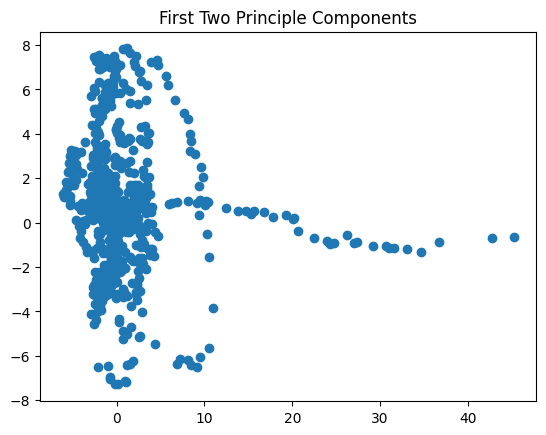

In [6]:
part_PCA = DR().dPCA(n = 2, data = train_scaled)
plt.scatter(part_PCA[:,0],part_PCA[:,1])
plt.title("First Two Principle Components")

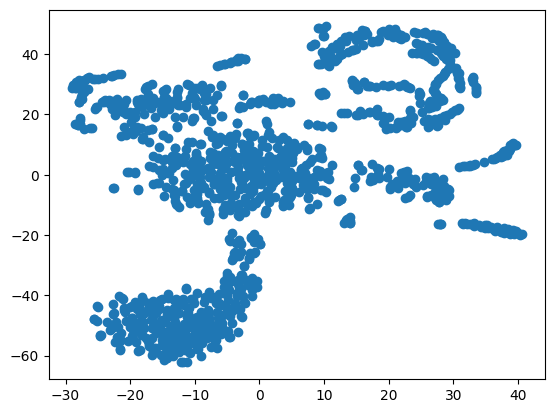

In [7]:
part_tSNE = DR().dtSNE(n = 2, data = train_scaled)
plt.scatter(part_tSNE[:,0], part_tSNE[:,1])